# Анализ и предсказание оттока клиентов оператора связи 'ТелеДом'

В целях борьбы с оттоком клиентов оператор связи "ТелеДом" разрабатывает модель, предсказывающую разорвет ли абонент договор

Исходя из ТЗ, для заказчика наиболее важным является качество модели. Про скорость обучения модели и время предсказания указаний дано не было.

# Описание услуг

**Оператор предоставляет два основных типа услуг:** 

* Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.

* Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

**Также доступны такие услуги:**

* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);

* Выделенная линия технической поддержки (TechSupport);

* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);

* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

**Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.**

# Описание данных

**Данные состоят из нескольких файлов, полученных из разных источников:**<br>
* contract_new.csv — информация о договоре;<br>
* personal_new.csv — персональные данные клиента;<br>
* internet_new.csv — информация об интернет-услугах;<br>
* phone_new.csv — информация об услугах телефонии.

**Файл contract_new.csv**

* customerID — идентификатор абонента;
* BeginDate — дата начала действия договора;
* EndDate — дата окончания действия договора;
* Type — тип оплаты: раз в год-два или ежемесячно;
* PaperlessBilling — электронный расчётный лист;
* PaymentMethod — тип платежа;
* MonthlyCharges — расходы за месяц;
* TotalCharges — общие расходы абонента.

**Файл personal_new.csv**

* customerID — идентификатор пользователя;
* gender — пол;
* SeniorCitizen — является ли абонент пенсионером;
* Partner — есть ли у абонента супруг или супруга;
* Dependents — есть ли у абонента дети.

**Файл internet_new.csv**

* customerID — идентификатор пользователя;
* InternetService — тип подключения;
* OnlineSecurity — блокировка опасных сайтов;
* OnlineBackup — облачное хранилище файлов для резервного копирования данных;
* DeviceProtection — антивирус;
* TechSupport — выделенная линия технической поддержки;
* StreamingTV — стриминговое телевидение;
* StreamingMovies — каталог фильмов.

**Файл phone_new.csv**

* customerID — идентификатор пользователя;
* MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

# План работы

**Шаг 1. Загрузка данных**<br>
Загрузить данные и выполнить первичный осмотр<br>
**Шаг 2. Объеденение, исследовательский анализ и предобработка данных**<br>
Объеденить выбранные признаки в один датафрейм, выполнить исследовательский анализ и предобработку по необходимости, визуализировать распределения признаков, провести корреляционный анализ, сделать выводы об имеющихся признаках: понадобятся ли они для обучения модели. <br>
**Шаг 3. Подготовка данных**<br>
Выполнить подготовку данных для обучения модели. Разделить данные на две выборки.<br>
**Шаг 4. Обучение моделей машинного обучения**<br>
Обучить модели и подобрать гиперпараметры<br>
**Шаг 5. Выбор лучшей модели**<br>
Выбрать лучшую модель и проверить ее на тестовой выборке<br>
**Шаг 6. Общий вывод** <br>
Сделать общий вывод по проделанной работе

# Ход работы

## Загрузка данных и первичный осмотр.

### Импортирование необходимых библиотек

In [168]:
!pip install phik
!pip install shap

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from phik import phik_matrix
from catboost import Pool, CatBoostRegressor,CatBoostClassifier, CatBoost
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
import shap

In [170]:
RS = 111223

### Загрузка данных

In [171]:
contract = pd.read_csv('/datasets/contract_new.csv')
personal = pd.read_csv('/datasets/personal_new.csv')
internet = pd.read_csv('/datasets/internet_new.csv')
phone = pd.read_csv('/datasets/phone_new.csv')

In [172]:
display(
    contract.head(),
    personal.head(),
    internet.head(),
    phone.head()
)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [173]:
display(
    contract.info(),
    personal.info(),
    internet.info(),
    phone.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   D

None

None

None

None

### Промежуточный вывод

Данные были загружены успешно. Был произведен первичный осмотр.<br>
Интернетом пользуются примерно 78% клиентов<br>
Домашним телефоном примерно 90%<br>
**Пропусков в данных нет**

## Объеденение, исследовательский анализ и предобработка данных

### Объединение датафреймов 

In [174]:
data = contract.merge(personal, on='customerID', how='left')
data = data.merge(internet, on='customerID', how='left')
data = data.merge(phone, on='customerID', how='left')

In [175]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Таблицы были успешно объединены

### Предобработка и исследовательский анализ

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


ТК не все клиенты пользуются интернетом или домашней телефонией при объединении таблиц образовались пропуски.<br>
Они будут обработаны в первую очередь

В изначальных таблицах пропусков не было, следовательно они образовались после объединения<br>
При объединении дтаблиц данные потеряны не были о чем говорит кол-во ненулевых строк, равное изначальному кол-ву ненулеввых строк в датафреймах

**Пропуски в столбцах с категориальными признаками, так что решил заполнить их "not_used"**

In [177]:
data.fillna('No', inplace = True)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


В столбце TotalCharges хранится общая сумма трат каждого пользователя, следовательно там долен быть тип float64(числа с плавабщей точкой), а не object(строка)

In [179]:
data['TotalCharges'].value_counts()

           11
20.45       6
101.0       5
1007.5      4
732.6       4
           ..
4102.2      1
428.59      1
1358.4      1
1398.75     1
4403.85     1
Name: TotalCharges, Length: 6658, dtype: int64

В некоторых строках значение TotalCharges равно пустой строке

In [180]:
print(data.select_dtypes(include=['object']).apply(lambda x: x.str.strip().eq('')).sum())

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
TotalCharges        11
gender               0
Partner              0
Dependents           0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
MultipleLines        0
dtype: int64


в остальных столбцах с типом object такой проблемы обнаружено не было

In [181]:
data.query('TotalCharges == " "')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,No,No,No,No,No,No,No,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,No,No,No,No,No,No,No,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


In [182]:
data.query('TotalCharges != " "').sort_values(by = 'BeginDate', ascending = False).head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
4325,2700-LUEVA,2020-01-01,No,Month-to-month,No,Credit card (automatic),20.75,22.0,Male,0,No,No,No,No,No,No,No,No,No,No
222,6469-MRVET,2020-01-01,No,One year,Yes,Electronic check,20.20,20.2,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
1813,0817-HSUSE,2020-01-01,No,Month-to-month,Yes,Electronic check,75.50,75.5,Male,0,No,No,DSL,No,No,Yes,Yes,Yes,Yes,No
3065,5133-POWUA,2020-01-01,No,Month-to-month,Yes,Mailed check,45.80,47.63,Male,0,No,No,DSL,No,No,No,No,No,No,No


Пустой строкой решили обозначить тех, кто оформил договор в дату выгрузки данных и еще ничего не заплатил<br>
В итоге можно заменить на 0

In [183]:
data.replace(' ', 0, inplace=True)

In [184]:
data['TotalCharges'].value_counts()

0          11
20.45       6
101.0       5
21.53       4
255.0       4
           ..
1358.4      1
1398.75     1
1572.93     1
4742.24     1
4403.85     1
Name: TotalCharges, Length: 6658, dtype: int64

In [185]:
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [186]:
data.duplicated().sum()

0

In [187]:
data.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

Пропусков и дубликатов в данных нет. Пустые строки были ликвидированы

**Поиск аномалий**

In [188]:
print(f'даты в диапазоне от {data["BeginDate"].min()} до {data["BeginDate"].max()}')

даты в диапазоне от 2013-10-01 до 2020-02-01


Аномалий в датах нет

Выбросов в ежемесячной оплате:  0


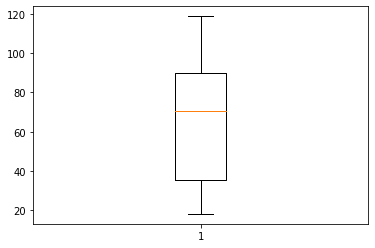

In [189]:
boxplot = plt.boxplot(data['MonthlyCharges'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
print("Выбросов в ежемесячной оплате: ", len(outliers)) 

Выбросов в общих тратах:  195


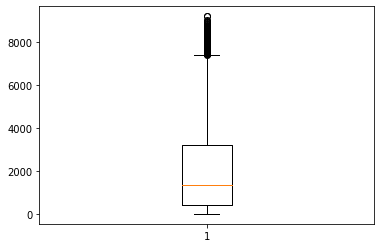

In [190]:
boxplot = plt.boxplot(data.query('TotalCharges > 0')['TotalCharges'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
print("Выбросов в общих тратах: ", len(outliers)) 

In [191]:
data.sort_values(by = 'TotalCharges', ascending = False).head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
4610,2889-FPWRM,2013-10-01,No,One year,Yes,Bank transfer (automatic),117.80,9221.38,Male,0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5558,0675-NCDYU,2014-02-01,No,Two year,Yes,Credit card (automatic),116.40,9218.88,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2559,8263-QMNTJ,2014-02-01,No,Two year,Yes,Electronic check,115.55,9068.36,Male,0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4206,0017-IUDMW,2014-02-01,No,Two year,Yes,Credit card (automatic),116.80,8998.27,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
540,6859-QNXIQ,2014-02-01,No,Two year,Yes,Bank transfer (automatic),113.10,8957.52,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [192]:
(
    data.loc[
        data['BeginDate'] ==
        data.
        sort_values(by = 'TotalCharges', ascending = False).
        head(195)
        ['BeginDate'].max()
    ].sort_values(by = 'TotalCharges', ascending = False)
    .head(1)
)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
3912,3882-IYOIJ,2015-02-01,No,Two year,No,Credit card (automatic),115.25,7537.35,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes


Аномалий в TotalCharges нет. Высокие значения обусловлены тем, что люди крайне долго являются абонентами

In [193]:
def ended(row):
    end_d = row['EndDate']
    if end_d == 'No':
        return 0
    else:
        return 1

In [194]:
data['end'] = data.apply(ended,axis = 1)

<AxesSubplot:>

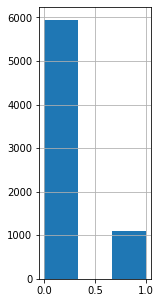

In [195]:
data['end'].hist(figsize= (2,5), bins = 3)

In [196]:
print(f'ТелеДом покинули {(data.query("end == 1")["end"].count() / data["end"].count() * 100).round(2)}% клиентов')

ТелеДом покинули 15.63% клиентов


столбец - Type:


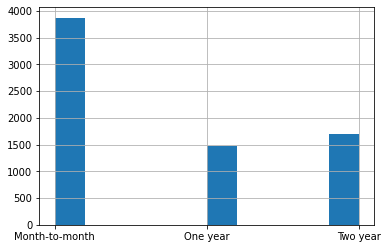

столбец - PaperlessBilling:


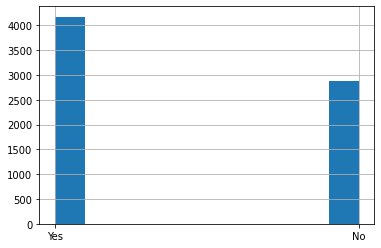

столбец - PaymentMethod:


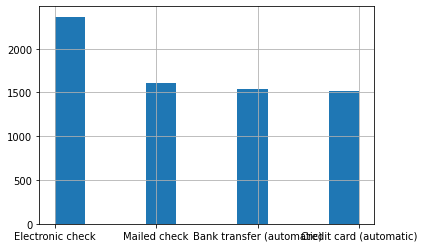

столбец - gender:


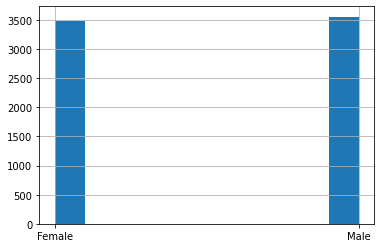

столбец - SeniorCitizen:


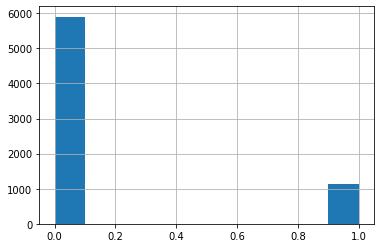

столбец - Partner:


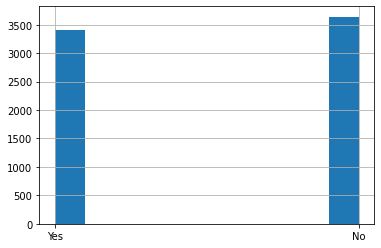

столбец - Dependents:


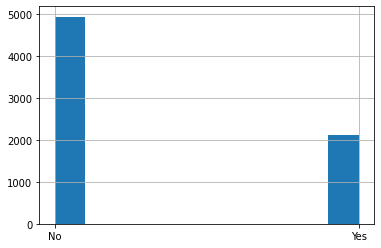

столбец - InternetService:


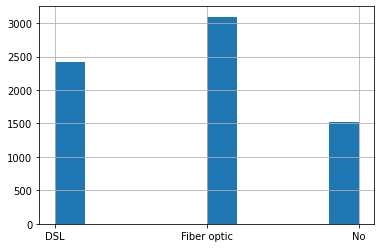

столбец - OnlineSecurity:


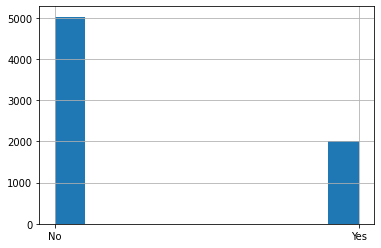

столбец - OnlineBackup:


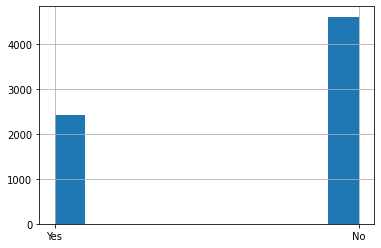

столбец - DeviceProtection:


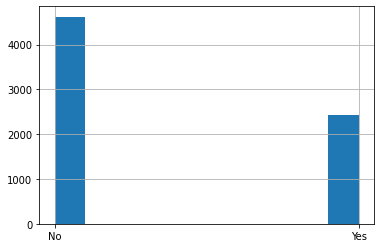

столбец - TechSupport:


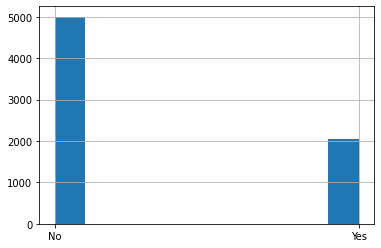

столбец - StreamingTV:


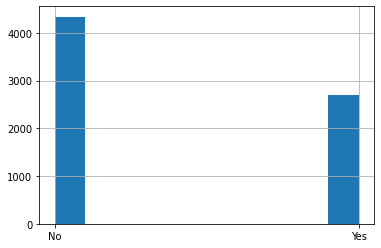

столбец - StreamingMovies:


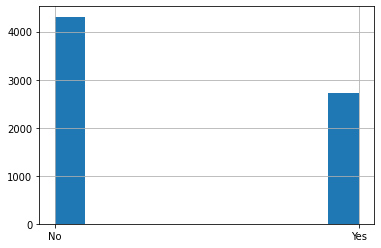

столбец - MultipleLines:


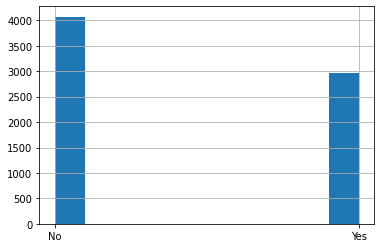

In [197]:
for column in data.columns.drop(['customerID','BeginDate', 'EndDate','MonthlyCharges', 'TotalCharges', 'end']):
    print(f'столбец - {column}:')
    data[column].hist()
    plt.show()

**Баланс классов**<br>
* Type: кол-во month-to-month превышает сумму кол-ва остальных классов<br>
* PaperlessBilling: большая часть клиентов получает электронный расчетный лист<br>
* PaymentMethod: наиболее популярный вариант - Electronic check, остальные варианты встречаются с одиноковой частотой<br>
* gender: Мужчин и женщин +- одинаково<br>
* SeniorCitizen: Тут самый большой дисбалан. Пенсионеров всего примерно 16%<br>
* Partner: абонентов без супруга или супруги немного больше.<br>
* Dependents: Лишь у трети абонентов есть дети<br>
* InternetService: Среди абонентов наиболее популярный тип подклбчения интернета fiber optic(примерно 60%)<br>
* OnlineSecurity: Блокировщик интересует лишь 37%<br>
* OnlineBackup: Аналогично с предыдущим<br>
* DeviceProtection: Также<br>
* TechSupport: Аналогично<br>
* StreamingTV: Примерно равны<br>
* StreamingMovies: Примерно равны<br>
* MultipleLines: Телефон подключен одновременно к несколькоим линиям у чуть меньшего числа пользователей

In [198]:
display(phik_matrix(data.loc[:,"BeginDate":]).sort_values(by = 'end', ascending = False))

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'end']


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,end
end,0.450254,1.000000,0.094015,0.083398,0.214832,0.226280,0.302890,0.008581,0.086159,0.226688,0.046871,0.056621,0.132594,0.229482,0.218380,0.103652,0.200198,0.222232,0.261237,1.000000
EndDate,0.548313,1.000000,0.285429,0.062936,0.169262,0.173493,0.217670,0.018274,0.090502,0.177492,0.055518,0.117099,0.129611,0.203659,0.197691,0.112812,0.164794,0.177561,0.209337,1.000000
BeginDate,1.000000,0.548313,0.766249,0.081447,0.456389,0.421886,0.774207,0.011268,0.050862,0.473514,0.208564,0.192197,0.403560,0.445583,0.456002,0.399506,0.359784,0.371863,0.428109,0.450254
TotalCharges,0.774207,0.217670,0.470860,0.201703,0.335666,0.710905,1.000000,0.000000,0.135650,0.381958,0.084247,0.490081,0.522090,0.622445,0.640977,0.550065,0.641488,0.643210,0.573191,0.302890
MultipleLines,0.428109,0.209337,0.065498,0.252972,0.339313,0.675883,0.573191,0.000000,0.221313,0.220101,0.033103,0.225383,0.151886,0.311403,0.309757,0.155739,0.392239,0.394553,1.000000,0.261237
OnlineBackup,0.445583,0.203659,0.098884,0.196443,0.282475,0.629541,0.622445,0.009882,0.102065,0.219223,0.031533,0.233602,0.430425,1.000000,0.458211,0.445130,0.428007,0.417170,0.311403,0.229482
Partner,0.473514,0.177492,0.179736,0.013218,0.243008,0.203545,0.381958,0.000000,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.220101,0.226688
MonthlyCharges,0.421886,0.173493,0.388444,0.467812,0.399526,1.000000,0.710905,0.008175,0.304985,0.203545,0.184366,0.919002,0.551621,0.629541,0.667481,0.576525,0.835340,0.833307,0.675883,0.226280
StreamingMovies,0.371863,0.177561,0.069608,0.325551,0.378907,0.833307,0.643210,0.000000,0.186141,0.182011,0.058999,0.272782,0.289097,0.417170,0.589888,0.424078,0.742479,1.000000,0.394553,0.222232
DeviceProtection,0.456002,0.197691,0.137610,0.160796,0.306866,0.667481,0.640977,0.000000,0.090686,0.238079,0.010416,0.232916,0.418474,0.458211,1.000000,0.499267,0.575536,0.589888,0.309757,0.218380


 ### Промежуточный вывод
 

После объединения в данных появились пропуски, которые были заполнены "No".

Пустые строки в Total_Charges были заменены на 0.

Дубликатов, пропусков и пустых строк в данных нет.

Был обнаружен дисбаланс классов.

BeginDate, TotalCharges, Partner, MonthlyCharges, PaymentMethod - Признаки, которые имею наибольшую корреляцию с целевым.

Корреляция между полом и расторжением договора близка к 0

## Подготовка данных

### Удаление ненужных признаков и создание новых

In [199]:
data.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'end'],
      dtype='object')

In [200]:
data['EndDate'].replace('No', '2020-02-01', inplace = True)

In [201]:
data['days'] = (pd.to_datetime(data['EndDate']) - pd.to_datetime(data['BeginDate'])).dt.days

CustomerId уже бесполезен, BeginDate и EndDate создадут утечку, пол, судя по матрице корреляций вообще ни на что не влияет.

In [202]:
data.drop(['customerID', 'BeginDate', 'EndDate', 'gender'], axis = 1, inplace = True)

### Разделение данных

In [203]:
features = data.drop('end', axis = 1)
target = data['end']

In [204]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=RS, test_size=0.25
)


### Масштабирование 

In [205]:
scaler = StandardScaler()
scaler.fit(features_train[['MonthlyCharges','TotalCharges','days']])
features_train[['MonthlyCharges','TotalCharges', 'days']] = scaler.transform(features_train[['MonthlyCharges','TotalCharges', 'days']])
features_test[['MonthlyCharges','TotalCharges', 'days']] = scaler.transform(features_test[['MonthlyCharges','TotalCharges', 'days']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Кодирование данных

In [206]:
data.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'end',
       'days'],
      dtype='object')

In [207]:
features_train_f = features_train.copy()
features_test_f = features_test.copy()
enc = OrdinalEncoder()
col = data.select_dtypes(include=['object']).columns
enc.fit(features_train[col])
features_train_f[col] = enc.transform(features_train[col])
features_test_f[col] = enc.transform(features_test[col])

In [208]:

col = features_train.select_dtypes(include=['object']).columns
enc = OneHotEncoder(handle_unknown='error', sparse=False,drop='first')
enc.fit(features_train[col])
f_tr = enc.transform(features_train[col])
f_te = enc.transform(features_test[col])
features_train_l = pd.concat([pd.DataFrame(f_tr), features_train.drop(col,axis = 1).reset_index(drop = True)], axis = 1)
features_test_l = pd.concat([pd.DataFrame(f_te), features_test.drop(col,axis = 1).reset_index()], axis = 1)

In [209]:
target_train_l = target_train.reset_index(drop = True)
target_test_l = target_test.reset_index(drop = True)

### Промежуточный вывод

**Признаки для обучения моделей не включают:**<br>
* CustomerId<br>
* BeginDate и EndDate создадут утечку, поэтому были удалены<br>
* Gender, т.к. судя по матрице корреляций не имеет влияние на целевой признак

**Целевой признак**
* end

**Данные были разделены на тренировочную и тестовую выборки(размер тестовой 0.25)**
<br>


**Масштабирование было применено к столбцам MonthlyCharges и TotalCharges**
<br>


**Категориальные признаки были закодированы**
* OrdinalEncoder (features_train_f, features_test_f)<br>
* OHE (features_train_l, features_test_l, target_train_l, target_test_l)

## Поиск лучшей модели и гиперпараметров

### Catboost

Создание pool

In [210]:
cat_f= [a for a in features_train_f.select_dtypes(include=['object']).columns]
train_pool = Pool(features_train_f, 
                  target_train,
                  cat_features = cat_f)
test_pool = Pool(features_test_f,
                  cat_features= cat_f)


In [211]:
params = {
    'verbose' : [1000],
    'depth': [2,3,4],
    'iterations': [400, 750, 1500],
    'learning_rate' : [0.05, 0.1, 0.185 , 0.3]
}

model = CatBoostClassifier(random_state=RS, custom_metric = 'AUC', eval_metric='AUC')
grid_search_result = model.grid_search(params, train_pool, plot=True, cv = 5)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6179362	best: 0.6179362 (0)	total: 1.42ms	remaining: 569ms
399:	test: 0.8399183	best: 0.8399718 (398)	total: 382ms	remaining: 0us

bestTest = 0.8399718443
bestIteration = 398

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8399718	best: 0.8399718 (0)	total: 866ms	remaining: 30.3s
0:	test: 0.6179362	best: 0.6179362 (0)	total: 1.21ms	remaining: 482ms
399:	test: 0.8639195	best: 0.8639501 (397)	total: 386ms	remaining: 0us

bestTest = 0.8639500543
bestIteration = 397

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8639501	be

In [212]:
params = {
    'verbose' : [1000],
    'depth': [2],
    'iterations': [1500],
    'learning_rate' : [i/1000 for i in range(185,450,3)]
}

model = CatBoostClassifier(random_state=RS, custom_metric = 'AUC', eval_metric='AUC')
grid_search_result = model.grid_search(params, train_pool, plot=True, cv = 5)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6179362	best: 0.6179362 (0)	total: 1.34ms	remaining: 2.01s
1000:	test: 0.9170173	best: 0.9176065 (946)	total: 1s	remaining: 500ms
1499:	test: 0.9142171	best: 0.9180273 (1060)	total: 1.52s	remaining: 0us

bestTest = 0.9180272681
bestIteration = 1060

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.9180273	best: 0.9180273 (0)	total: 2s	remaining: 2m 55s
0:	test: 0.6179362	best: 0.6179362 (0)	total: 1.23ms	remaining: 1.84s
1000:	test: 0.9158926	best: 0.9182798 (869)	total: 1.01s	remaining: 506ms
1499:	test: 0.9145690	best: 0.9182798 (869)	total: 1.54s	remaining: 0us

bestTest = 0.9182797509
bestIteration = 869

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric A

In [213]:
params = {
    'verbose' : [1000],
    'depth': [2],
    'iterations': [i for i in range(500,1500,50)],
    'learning_rate' : [0.401]
}

model = CatBoostClassifier(random_state=RS, custom_metric = 'AUC', eval_metric='AUC')
grid_search_result = model.grid_search(params, train_pool, plot=True, cv = 5)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6179362	best: 0.6179362 (0)	total: 1.42ms	remaining: 710ms
499:	test: 0.9242016	best: 0.9242016 (499)	total: 511ms	remaining: 0us

bestTest = 0.9242016189
bestIteration = 499

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.9242016	best: 0.9242016 (0)	total: 1.08s	remaining: 20.6s
0:	test: 0.6179362	best: 0.6179362 (0)	total: 1.05ms	remaining: 580ms
549:	test: 0.9252422	best: 0.9266346 (541)	total: 530ms	remaining: 0us

bestTest = 0.9266346345
bestIteration = 541

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.9266346	be

In [214]:
model.get_params()

{'custom_metric': 'AUC',
 'eval_metric': 'AUC',
 'random_state': 111223,
 'depth': 2,
 'verbose': 1000,
 'iterations': 550,
 'learning_rate': 0.401}

Для модели catboost с гиперпараметрами depth = 2, learning_rate = 0.401, iterarions = 550 удалось получить auc = 0.9266 на валидационной выборке

### Решающее дерево

In [215]:
%%time
model_tree = DecisionTreeClassifier(random_state = RS)
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1,19,3)],
    'min_samples_split': [2,3,4,5,6, 7],
    'min_samples_leaf': [i for i in range(10,300,15)]
}
grid_search = GridSearchCV(estimator=model_tree, param_grid=param, cv=5,scoring='roc_auc', verbose=1)
grid_search.fit(features_train_f, target_train)
print(f"Параметры: {grid_search.best_params_}")
print(f"AUC = {grid_search.best_score_}")

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 115, 'min_samples_split': 2}
AUC = 0.8107071160567582
CPU times: user 1min 31s, sys: 106 ms, total: 1min 31s
Wall time: 1min 31s


**Для решающего дерево удалось получить auc = 0.810 на кросс-валидации**

### Logistic Regression

In [216]:
l_model = LogisticRegression(random_state=RS)
param = {
    'solver': ['liblinear'],
    'max_iter': [20,30,40,50,75,100, 500, 1000, 3000]
}
grid_search = GridSearchCV(estimator=l_model, param_grid=param, cv=5,scoring='roc_auc', verbose=1)
grid_search.fit(features_train_l, target_train_l)
print(f"Параметры: {grid_search.best_params_}")
print(f'auc = {grid_search.best_score_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Параметры: {'max_iter': 20, 'solver': 'liblinear'}
auc = 0.7675389460653406


### Промежуточный вывод

Лучшие результаты показала моедль Catboost<br>
Для модели catboost с гиперпараметрами depth = 2, l2_leaf_reg = 1, learning_rate = 0.185, iterarions = 670 удалось получить **auc = 0.924239** на кросс-валидации

## Тестирование модели Catboost на тестовой выборке и интерпертация результатов

###  Тестирование модели

In [217]:
params = {'custom_metric': 'AUC',
 'eval_metric': 'AUC',
 'random_state': 111223,
 'depth': 2,
 'verbose': 1000,
 'iterations': 550,
 'learning_rate': 0.401}


model = CatBoostClassifier(**params)
model.fit(train_pool)
prob_one = model.predict_proba(test_pool)[:, 1]
print(f'AUC на тестовых данных: {roc_auc_score(target_test, prob_one)}')

0:	total: 1.73ms	remaining: 951ms
549:	total: 585ms	remaining: 0us
AUC на тестовых данных: 0.9145142767068997


### Анализ значимости классов

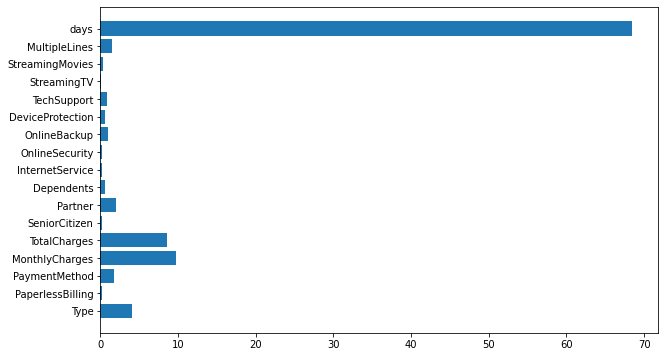

In [218]:
fig, ax = plt.subplots(figsize = (10,6))
ax.barh(features_train.columns, model.get_feature_importance())
plt.show()

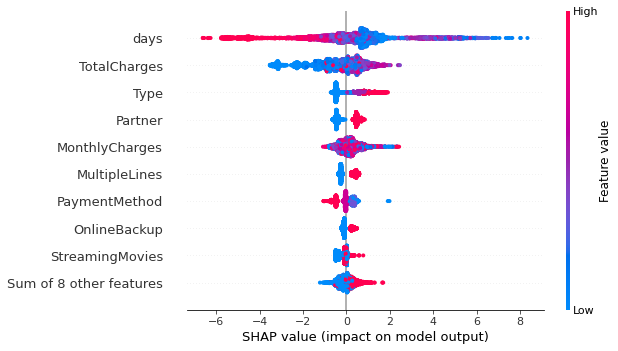

In [219]:
ex = shap.TreeExplainer(model)
shap_v = ex(features_train_f)
shap.plots.beeswarm(shap_v)

Для определения верности клиента самый важный признак 
* **Сколько дней человек является клиентом**<br>

на втором месте:
* **TotalCharges**<br>

также важны:
* Monthly Charges
* Type
* Partner
* PaymentMethod

In [220]:
features_test_f.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days
5076,1.0,1.0,2.0,0.969170,-0.225970,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.607293
2767,0.0,1.0,0.0,0.671265,0.839927,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.724337
6304,0.0,1.0,0.0,0.434596,-0.557311,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.781742
5590,0.0,1.0,3.0,-1.501787,-0.759255,0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.206060
1885,0.0,1.0,1.0,0.191306,-0.185935,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.251126


In [221]:
features_test.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days
5076,One year,Yes,Electronic check,0.969170,-0.225970,0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,No,-0.607293
2767,Month-to-month,Yes,Bank transfer (automatic),0.671265,0.839927,0,No,Yes,Fiber optic,No,No,Yes,Yes,No,No,Yes,0.724337
6304,Month-to-month,Yes,Bank transfer (automatic),0.434596,-0.557311,0,No,No,Fiber optic,No,No,No,No,Yes,No,No,-0.781742
5590,Month-to-month,Yes,Mailed check,-1.501787,-0.759255,0,Yes,Yes,No,No,No,No,No,No,No,No,-0.206060
1885,Month-to-month,Yes,Credit card (automatic),0.191306,-0.185935,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,No,-0.251126


Расшифровка кодировки<br>
* Type: Больше значение - больше срок
* Partner: 0 - False, 1 - True
* PaymentMethod: 0 -  Bank transfer, 1 - Credit card, 2 - Electronic check, 3 - MailedCheck 

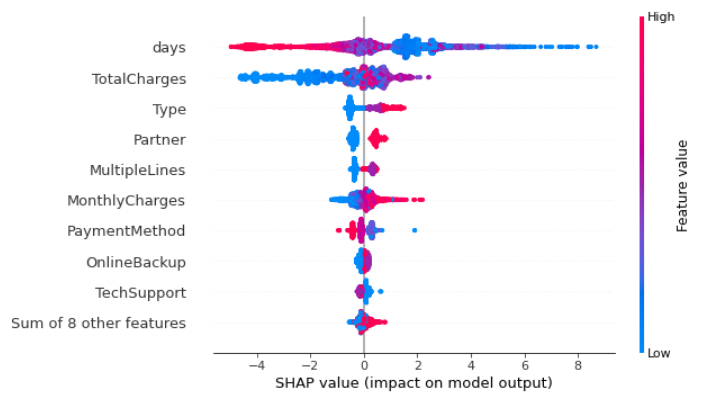

**Портрет лояльного клиента**
* Давно является клиентом
* В месяц платит не много
* В сумме заплатил немного
* Платит ежемесячно

**Портрет потенциального перебежчика**
* Среднее время или меньше является клиентом
* При этом много заплатил
* Много платит в месяц
* Есть партнер

### Промежуточный вывод

**Модель catboost с гиперпараметрами  depth = 2, learning_rate = 0.401, iterarions = 550 показала высокий результат auc score на тестовой выборке, равный 0.9145142767068997**<br>
Данный результат показывает, что модель хорошо различает классы и у нее мало ложных срабатываний и пропусков.

<br>Для определения верности клиента самым важным признаком является 
* **Кол-во дней, которые человек является клиентом**<br>

на втором месте:
* **TotalCharges**<br>

также важны:
* Monthly Charges
* Type
* Partner
* PaymentMethod

**Портрет лояльного клиента**
* Давно является клиентом
* В месяц платит не много
* В сумме заплатил немного
* Платит ежемесячно

**Портрет потенциального перебежчика**
* Среднее время или меньше является клиентом
* При этом много заплатил
* Много платит в месяц
* Есть партнер

**Выводы по портретам**
* Кто долго в компании, тем либо все равно, либо не хотят перемен.
* Кто в месяц мало платит тот и уходить не хочет
* Кто в сумме мало заплатил, также уходит реже
* Возможно оплата раз в месяц дает людям возможность менять тарифы и отказываться от услуг, поэтому они реже покидают компанию

По имеющимся данным тяжело определить, почему наличие брака влияет на отказ от услуг оператора.<br>
Возможно это связано с тем, что другие операторы предлагают более выгодные тарифы для пар или же делают скидку для тех, кто оформляет более широкий спектр услуг

## Вывод

**Про предобработку**
* На этапе предобработки все датафреймы были объединены в один, что создало пропуски, если человек не пользовался какой-то из услуг. Эти пропуски были заменены на 'No'.<br>
Большe аномалий, пропусков и дубликатов в данных обнаружено не было.<br>
Был обработан только столбец Total_charges, т.к содержал пустую строку, если человек еще ничего не заплатил(заменил на 0)

**Про краткий анализ данных**
* На этапе анализа данных
был обнаружен дисбаланс классов.<br>
BeginDate, TotalCharges, Partner, MonthlyCharges, PaymentMethod - Признаки, которые имею наибольшую корреляцию с целевым.<br>
Корреляция между полом и расторжением договора близка к 0

Баланс классов<br>
* Type: кол-во month-to-month превышает сумму кол-ва остальных классов<br>
* PaperlessBilling: большая часть клиентов получает электронный расчетный лист<br>
* PaymentMethod: наиболее популярный вариант - Electronic check, остальные варианты встречаются с одиноковой частотой<br>
* gender: Мужчин и женщин +- одинаково<br>
* SeniorCitizen: Тут самый большой дисбалан. Пенсионеров всего примерно 16%<br>
* Partner: абонентов без супруга или супруги немного больше.<br>
* Dependents: Лишь у трети абонентов есть дети<br>
* InternetService: Среди абонентов наиболее популярный тип подклбчения интернета fiber optic(примерно 60%)<br>
* OnlineSecurity: Блокировщик интересует лишь 37%<br>
* OnlineBackup: Аналогично с предыдущим<br>
* DeviceProtection: Также<br>
* TechSupport: Аналогично<br>
* StreamingTV: Примерно равны<br>
* StreamingMovies: Примерно равны<br>
* MultipleLines: Телефон подключен одновременно к несколькоим линиям у чуть меньшего числа пользователей

**Про подготовку данных для обучению моделей**<br>
**Признаки для обучения моделей не включают:**<br>
* CustomerId<br>
* BeginDate и EndDate создадут утечку, поэтому были удалены<br>
* Gender, т.к. судя по матрице корреляций не имеет влияние на целевой признак

**Целевой признак**
* end

**Данные были разделены на тренировочную и тестовую выборки(размер тестовой 0.25)**
<br>


**Масштабирование было применено к столбцам MonthlyCharges и TotalCharges**
<br>


**Категориальные признаки были закодированы**
* OrdinalEncoder (features_train_f, features_test_f)<br>
* OHE (features_train_l, features_test_l, target_train_l, target_test_l)

**Про обучение моделей**<br>
Были обучены модели:
* Catboost<br>
* decision_tree<br>
* logistic_regressor<br>

Для всех моделей был применен GridSearch для поиска лучших гиперпараметрах с использованием кросс-валидации<br>
**Лучшие результаты метрики auc_roc показала модель catboost с гиперпараметрами**<br> 
* depth = 2<br>
* learning_rate = 0.401<br>
* iterarions = 550


**Про тестирование catboost**<br>
* С указанными выше гиперпараметрами на тестовой выборке auc_roc = 0.917669113673212 

**Про анализ значимости классов**
<br>Для определения верности клиента самым важным признаком является 
* **Кол-во дней, которые человек является клиентом**<br>

на втором месте:
* **TotalCharges**<br>

также важны:
* Monthly Charges
* Type
* Partner
* PaymentMethod

**Портрет лояльного клиента**
* Давно является клиентом
* В месяц платит не много
* В сумме заплатил немного
* Платит ежемесячно

**Портрет потенциального перебежчика**
* Среднее время или меньше является клиентом
* При этом много заплатил
* Много платит в месяц
* Есть партнер

**Выводы по портретам**
* Кто долго в компании, тем либо все равно, либо не хотят перемен.
* Кто в месяц мало платит тот и уходить не хочет
* Кто в сумме мало заплатил, также уходит реже
* Возможно оплата раз в месяц дает людям возможность менять тарифы и отказываться от услуг, поэтому они реже покидают компанию

По имеющимся данным тяжело определить, почему наличие брака влияет на отказ от услуг оператора.<br>
Возможно это связано с тем, что другие операторы предлагают более выгодные тарифы для пар или же делают скидку для тех, кто оформляет более широкий спектр услуг

В любом случае, предоставление скидки людям из группы риска уже должно сильно наладить положение дел